#  제4장

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from matplotlib import font_manager, rc
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

###한글 폰트###
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
rcParams['axes.unicode_minus'] = False

In [2]:
from tabulate import tabulate
import os
from ipypublish import nb_setup
from IPython.display import Image

In [3]:
import FinanceDataReader as fdr

In [4]:
#부트스트랩팅

Value at risk (VaR) is a measure of the risk of loss for investments. It estimates how much a set of investments might lose (with a given probability), given normal market conditions, in a set time period such as a day. VaR is typically used by firms and regulators in the financial industry to gauge the amount of assets needed to cover possible losses.

For a given portfolio, time horizon, and probability p, the p VaR can be defined informally as the maximum possible loss during that time after we exclude all worse outcomes whose combined probability is at most p. This assumes mark-to-market pricing, and no trading in the portfolio.[1]

For example, if a portfolio of stocks has a one-day 5% VaR of $1 million, that means that there is a 0.05 probability that the portfolio will fall in value by more than $1 million over a one-day period if there is no trading. Informally, a loss of $1 million or more on this portfolio is expected on 1 day out of 20 days (because of 5% probability).

More formally, p VaR is defined such that the probability of a loss greater than VaR is (at most) p while the probability of a loss less than VaR is (at least) 1−p. A loss which exceeds the VaR threshold is termed a "VaR breach".[2]

It is important to note that, for a fixed p, the p VaR does not assess the magnitude of loss when a VaR breach occurs and therefore is considered by some to be a questionable metric for risk management. For instance, assume someone makes a bet that flipping a coin seven times will not give seven heads. The terms are that they win $100 if this does not happen (with probability 127/128) and lose $12,700 if it does (with probability 1/128). That is, the possible loss amounts are $0 or $12,700. The 1% VaR is then $0, because the probability of any loss at all is 1/128 which is less than 1%. They are, however, exposed to a possible loss of $12,700 which can be expressed as the p VaR for any p <= 0.78%.[3]

VaR has four main uses in finance: risk management, financial control, financial reporting and computing regulatory capital. VaR is sometimes used in non-financial applications as well.[4] However, it is a controversial risk management tool.

In [5]:
df = fdr.DataReader('005930', '2010-01-01') # 2018-01-01 ~ 현재

In [6]:
#log returns

In [7]:
df['ret'] = np.log(df.Close) - np.log(df.Close.shift(1))

In [8]:
# 삼성전자()"005930"
df = df.loc[ '2012-01-01':'2021-12-31'] #10년간 거래내역

In [10]:
df.head()

,Open,High,Low,Close,Volume,Change,ret
Date,,,,,,,
2012-01-02,21400,21600,21300,21600,263300,0.020794,0.020581
2012-01-03,21860,22100,21840,22100,339046,0.023148,0.022884
2012-01-04,22100,22200,21500,21600,342389,-0.022624,-0.022884
2012-01-05,21460,21580,21100,21100,346691,-0.023148,-0.023420
2012-01-06,21120,21319,20600,20800,376753,-0.014218,-0.014320


In [11]:
len(df)

2463

In [12]:
df1 = df.dropna()

In [13]:
df2 = df1['ret']

In [14]:
df2

Date
2012-01-02    0.020581
2012-01-03    0.022884
2012-01-04   -0.022884
2012-01-05   -0.023420
2012-01-06   -0.014320
                ...   
2021-12-24    0.007481
2021-12-27   -0.003734
2021-12-28    0.001246
2021-12-29   -0.018857
2021-12-30   -0.006365
Name: ret, Length: 2463, dtype: float64

In [15]:
df2.mean()

0.0005312362955772061

In [16]:
sample = np.random.choice(df2, size=125, replace=True)

In [17]:
len(sample)

125

In [18]:
sample_sum = sample.sum()

In [19]:
sample_sum

-0.0230199841375871

In [20]:
sum_boots = []

days = 125 #투자일수
n = 1000 # 반복실행횟수

for i in range(n):
    sample = np.random.choice(df2, size=days, replace=True)
    sample_sum = sample.sum()
    sum_boots.append(sample_sum)  


In [21]:
len(sum_boots)

1000

In [22]:
sum_boots

[-0.1607220587917535,
 -0.19814421478267086,
 0.11311946334577527,
 0.007988589791555256,
 0.08714067824255878,
 -0.06675154980098164,
 0.09056730850588224,
 0.1457153377455569,
 0.03261890666822609,
 0.24657111066717263,
 0.10187090608186544,
 0.32664430859566806,
 -0.43422306391855336,
 0.15704355753419108,
 -0.1385686935210355,
 -0.09933315026021461,
 0.03957191194841947,
 0.13462386898960332,
 0.051764608897608255,
 0.30580244744261087,
 -0.08075508791205088,
 -0.04961913894745251,
 0.1522784128233141,
 -0.024713067834667868,
 -0.024712701181814012,
 -0.09932387092249328,
 0.2022674097778303,
 0.053431456020886614,
 0.13639062825981974,
 -0.07165841100747272,
 0.07463874114104918,
 0.22976677643555554,
 -0.29490448249617707,
 -0.05122526881822864,
 0.2095393235870997,
 0.10963550961879776,
 0.15481750737854583,
 0.04421243692754295,
 -0.04463281121246254,
 -0.26104144613116276,
 0.003486162670160553,
 0.12482609115087229,
 0.009469334382641748,
 0.26976795092710226,
 0.135198983138

In [23]:
#sum_boots

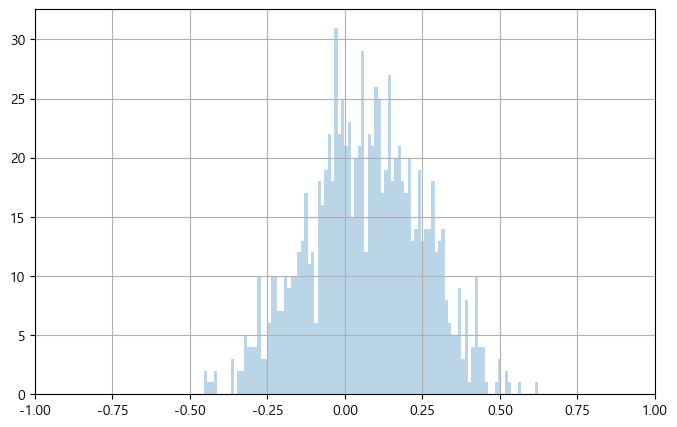

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(sum_boots, alpha=0.3, bins=100) 
ax.grid(True)
ax.set_xlim((-1, 1))
plt.savefig("bootstrapping01.png", dpi=150, bbox_inches='tight')
plt.show()

In [25]:
ret = np.array(sum_boots)

In [27]:
ret95 = np.percentile(ret, 95)

In [28]:
ret95

0.36578017472532903

In [29]:
ret5 = np.percentile(ret, 5)

In [30]:
ret5

-0.24296052502720517

In [31]:
# log return --> ret로 변환
Ret5 = np.exp(ret5) - 1

In [32]:
Ret5

-0.21569752652071084

In [33]:
VaR95= Ret5*100000000

In [34]:
VaR95

-21569752.652071085